In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Example Dataset 

In [2]:
mat = loadmat('Data/ex7data1.mat')
X = mat['X']

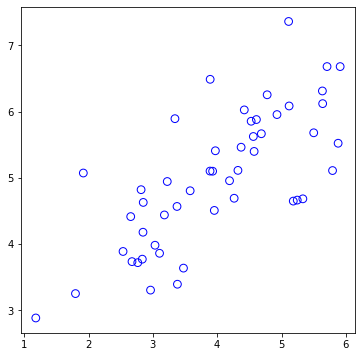

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=60, 
            facecolors='none', edgecolors='b')
plt.show()

# Feature Normalization 

In [4]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

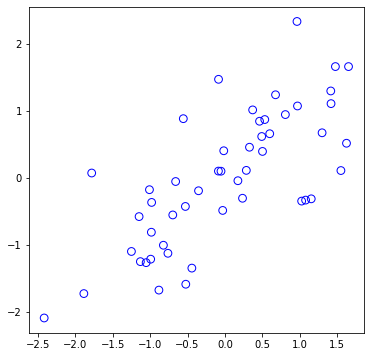

In [5]:
X_norm, mu, sigma = feature_normalize(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=60, 
            facecolors='none', edgecolors='b')
plt.show()

# Implementing PCA 

In [6]:
def pca(X):
    m, n = X.shape
    cov = np.matmul(X.T, X)/m
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [7]:
U, S, V = pca(X_norm)

In [8]:
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

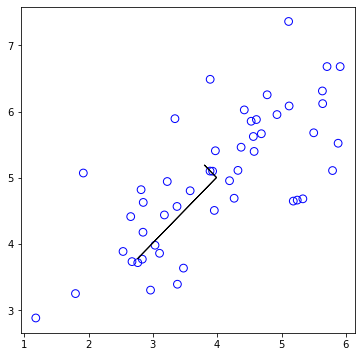

In [9]:
X_norm, mu, sigma = feature_normalize(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=60, 
            facecolors='none', edgecolors='b')

plt.arrow(*mu, *(U[0] * S[0]))
plt.arrow(*mu, *(U[1] * S[1]))
plt.show()

# Projecting data into principal component 

In [10]:
def project_data(X, U, K):
    Z = np.dot(U[:K], X_norm.T)
    return Z.T

In [11]:
K = 1
Z = project_data(X_norm, U, K)
Z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

# Reconstructing original data from PCA

In [12]:
def recover_data(Z, U, K):
    X_rec_t = np.matmul(U[:, :K], Z.T)
    return X_rec_t.T

In [13]:
X_rec = recover_data(Z, U, K)
X_rec

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802],
       [ 0.44666359,  0.44666359],
       [ 0.39088959,  0.39088959],
       [ 0.06341447,  0.06341447],
       [ 0.371835  ,  0.371835  ],
       [-1.10602429, -1.10602429],
       [ 1.35488989,  1.35488989],
       [ 0.62706042,  0.62706042],
       [-0.67604623, -0.67604623],
       [ 1.64752825,  1.64752825],
       [ 0.33795364,  0.33795364],
       [ 1.56798945,  1.56798945],
       [-0.27506901, -0.27506901],
       [ 1.26206077,  1.26206077],
       [-0.03659622, -0.03659622],
       [-1.17742041, -1.17742041],
       [-0.35930621, -0.35930621],
       [ 0.874769  ,  0.874769  ],
       [ 0.82871979,  0.82871979],
       [-0.59553725,

# PCA visualization 

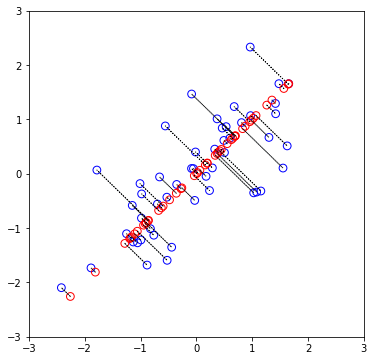

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=60, 
            facecolors='none', edgecolors='b')

plt.scatter(*X_rec.T, s=60, facecolors='none', edgecolors='r')

for i in range(len(X)):
    plt.arrow(*X_norm[i], *(X_rec[i]-X_norm[i]), linestyle=':')
    
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# PCA/Dimensionality reduction on faces data

In [15]:
mat = loadmat('Data/ex7faces.mat')
X = mat['X']

In [16]:
def plot_grid(X, sq_grid=8):
    imheight = int(X.shape[1] ** 0.5)
    fig, ax = plt.subplots(sq_grid, sq_grid, figsize = (10, 10))
    for i in range(sq_grid):
        for j in range(sq_grid):
            rnd_img = np.random.randint(X.shape[0])
            ax[i,j].imshow(X[rnd_img].reshape((imheight, imheight), order = 'F'), 
                           cmap = 'binary_r')
            ax[i, j].xaxis.set_major_locator(plt.NullLocator())
            ax[i, j].yaxis.set_major_locator(plt.NullLocator())
            fig.subplots_adjust(wspace = 0, hspace = 0)

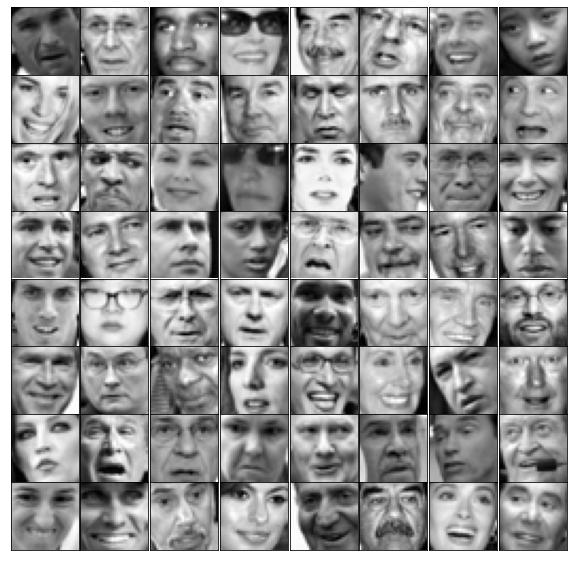

In [17]:
plot_grid(X)

# Normalized faces

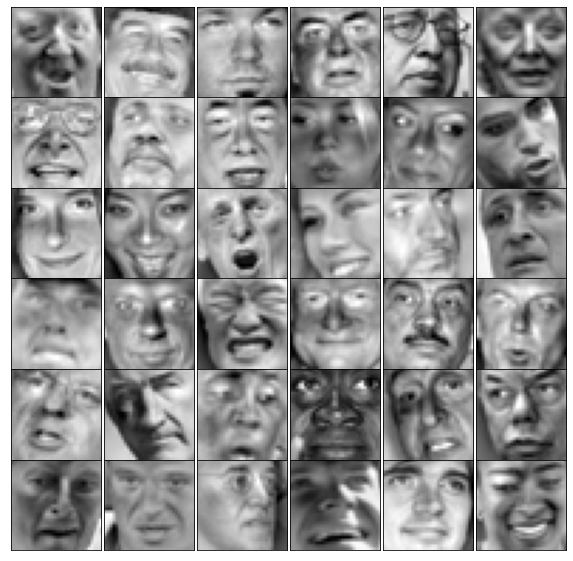

In [18]:
X_norm, mu, sigma = feature_normalize(X)

plot_grid(X_norm, sq_grid=6)

# Faces with top N PCA 

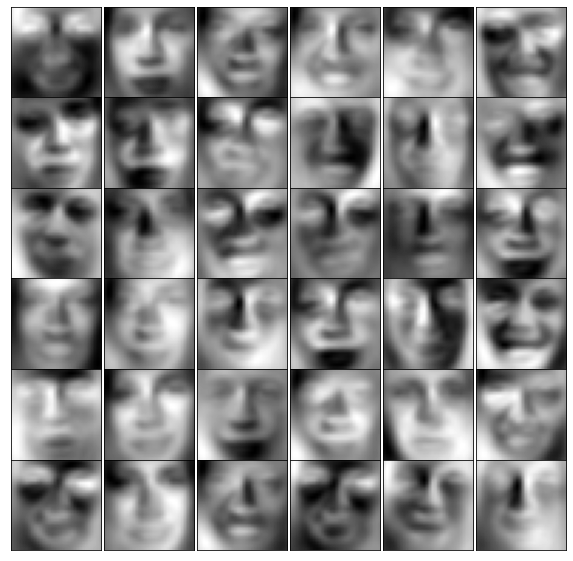

In [19]:
U, S, V = pca(X_norm)

K = 10
Z = project_data(X_norm, U, K)
X_rec = recover_data(Z, U, K)

plot_grid(X_rec, sq_grid=6)

# PCA as visualization of higher dimensional data 

In [20]:
from mpl_toolkits import mplot3d

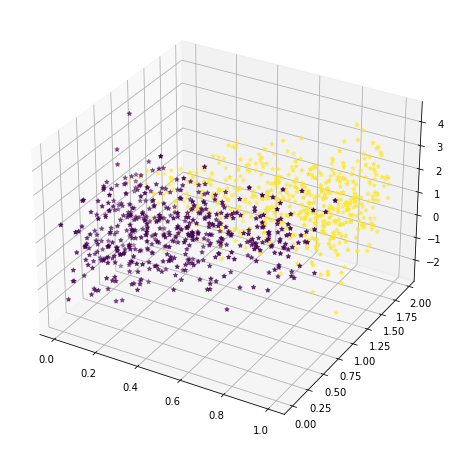

In [21]:
n = 1000
x = np.random.random(n)
y = x + np.random.random(n)
z = y + np.random.randn(n)
hue = y>1

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, zdir='z', c=hue,
             **{'marker': '*'})
plt.show()

In [22]:
X = np.array([x, y, z]).T
X_norm, mu, sigma = feature_normalize(X)
U, S, V = pca(X_norm)

K = 3
Z = project_data(X_norm, U, K)
X_rec = recover_data(Z, U, K)

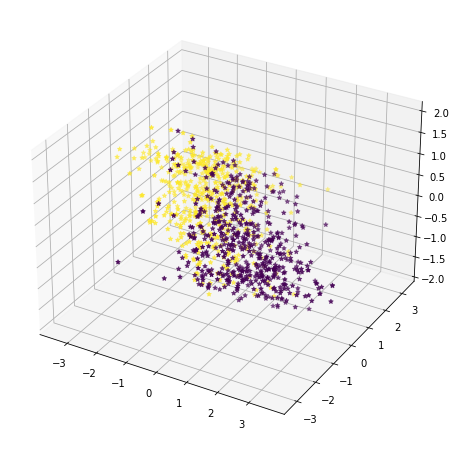

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(*X_rec.T, c=hue, **{'marker': '*'})
plt.show()

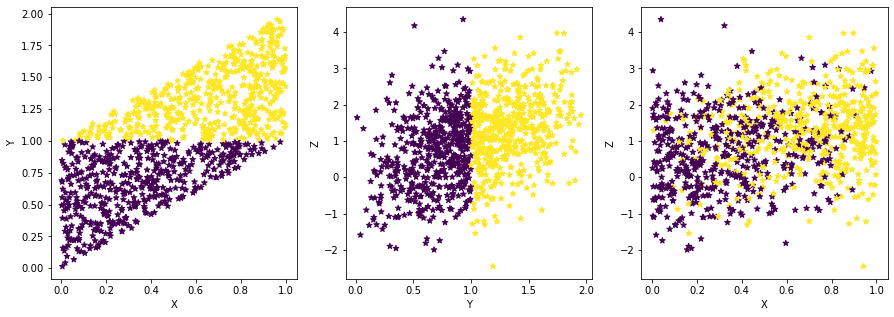

In [24]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
ax.scatter(X.T[0], X.T[1], c=hue, marker='*')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = fig.add_subplot(132)
ax.scatter(X.T[1], X.T[2], c=hue, marker='*')
ax.set_xlabel('Y')
ax.set_ylabel('Z')

ax = fig.add_subplot(133)
ax.scatter(X.T[0], X.T[2], c=hue, marker='*')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.show()

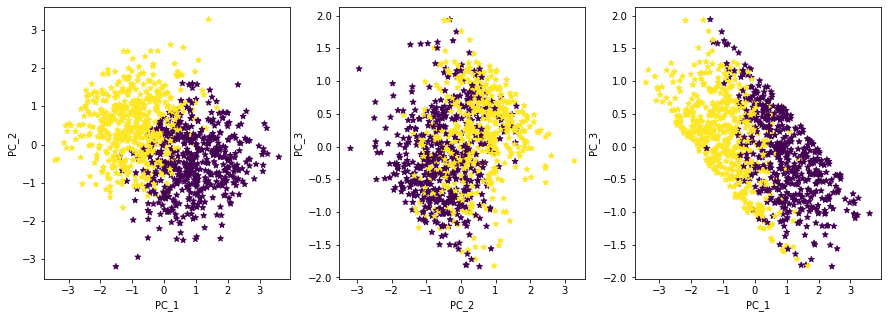

In [25]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
ax.scatter(X_rec.T[0], X_rec.T[1], c=hue, marker='*')
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')

ax = fig.add_subplot(132)
ax.scatter(X_rec.T[1], X_rec.T[2], c=hue, marker='*')
ax.set_xlabel('PC_2')
ax.set_ylabel('PC_3')

ax = fig.add_subplot(133)
ax.scatter(X_rec.T[0], X_rec.T[2], c=hue, marker='*')
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_3')
plt.show()